### Simulation 1

In [7]:
class Ball2(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((21.0, 15.0))
        self.limit0f = np.array((60.0, 15.0))
        
        self.limit0V0 = np.array((0.0, 0.0))
        self.limit0Vf = np.array((0.0, 0.0))
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((21.0, 15.0))
        self.limitf = np.array((60.0, 15.0))
        
        self.limitV0 = np.array((0.0, 0.0))
        self.limitVf = np.array((0.0, 0.0))

        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0

        self.xy += self.v
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        self.line0.set_data(self.limit0)
        self.linef.set_data(self.limitf)

<IPython.core.display.Javascript object>


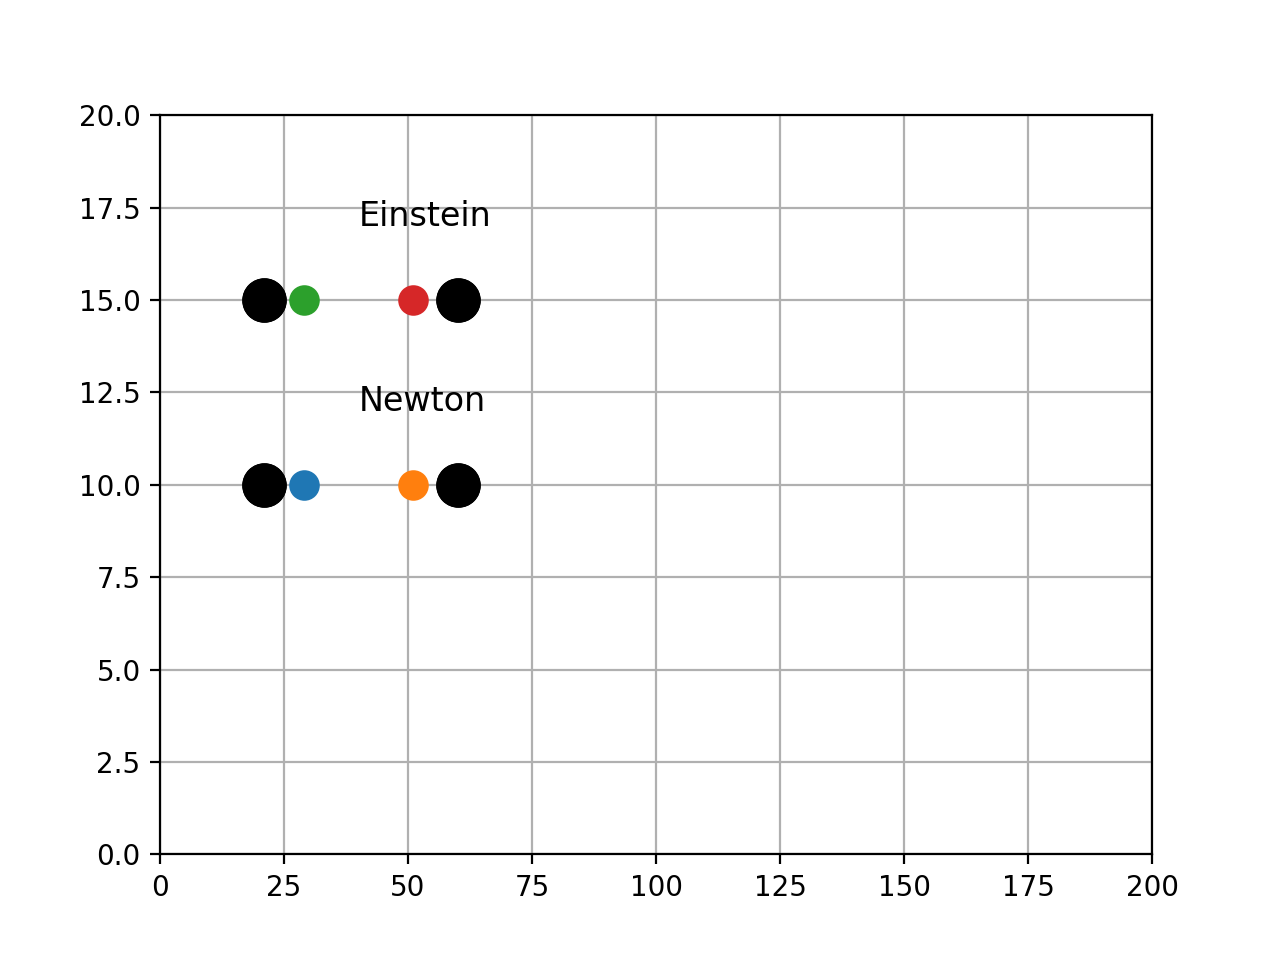

In [8]:
# when we're in pylab mode, the next two imports are not necessary
# we do it here for correctness sake, iow your code will also run without pylab mode

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib.animation as animation

cor = 1.0

# bounds of the room
xlim = (0,200)
ylim = (0,20)

# 1 millisecond delta t
delta_t = 0.001

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)
ax.grid()

# in Python 2.7 we have to derive from object to have new-style classes
# in Python 3 this is still valid, but not necessary, as all classes are new-style
class Ball(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((21.0, 10.0))
        self.limit0f = np.array((60.0, 10.0))
        
        self.limit0V0 = np.array((0.0, 0.0))
        self.limit0Vf = np.array((0.0, 0.0))
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((21.0, 10.0))
        self.limitf = np.array((60.0, 10.0))
        
        self.limitV0 = np.array((0.0, 0.0))
        self.limitVf = np.array((0.0, 0.0))
        
        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0
        
        self.xy += self.v
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        self.line0.set_data(self.limit0)
        self.linef.set_data(self.limitf)


#balls = [Ball((9.0,10.0), (-0.2,0.0)), Ball((9.0,10.0), (0.8,0.0))]

balls = [Ball((40,10.0), (-0.5,0.0)), Ball((40,10.0), (0.5,0.0)), 
          Ball2((40,15.0), (-0.5,0.0)), Ball2((40,15.0), (0.5,0.0))]

for ball in balls:
    ball.update()

def init():
    return []

def animate(t):
    # t is time in seconds
    global xy, v

    for ball in balls:
        ball.update()

    # have to return an iterable
    return [ball.scatter for ball in balls]

# interval in milliseconds
# we're watching in slow motion (delta t is shorter than interval)
ani = animation.FuncAnimation(fig, animate, np.arange(0,100,delta_t), init_func=init, interval=10, blit=True)

plt.text(40, 17, "Einstein", fontsize=12)
plt.text(40, 12, "Newton", fontsize=12)

plt.show()

In [9]:
plt.close()

### simulation 2 (simultaneity)

In [10]:
class Ball2(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((1.0, 15.0))
        self.limit0f = np.array((40.0, 15.0))
        
        self.limit0V0 = np.array((0.2, 0.0))
        self.limit0Vf = np.array((0.2, 0.0))
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((1.0, 15.0))
        self.limitf = np.array((40.0, 15.0))
        
        self.limitV0 = np.array((0.2, 0.0))
        self.limitVf = np.array((0.2, 0.0))

        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0

        self.xy += self.v
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        self.line0.set_data(self.limit0)
        self.linef.set_data(self.limitf)
        
        

<IPython.core.display.Javascript object>


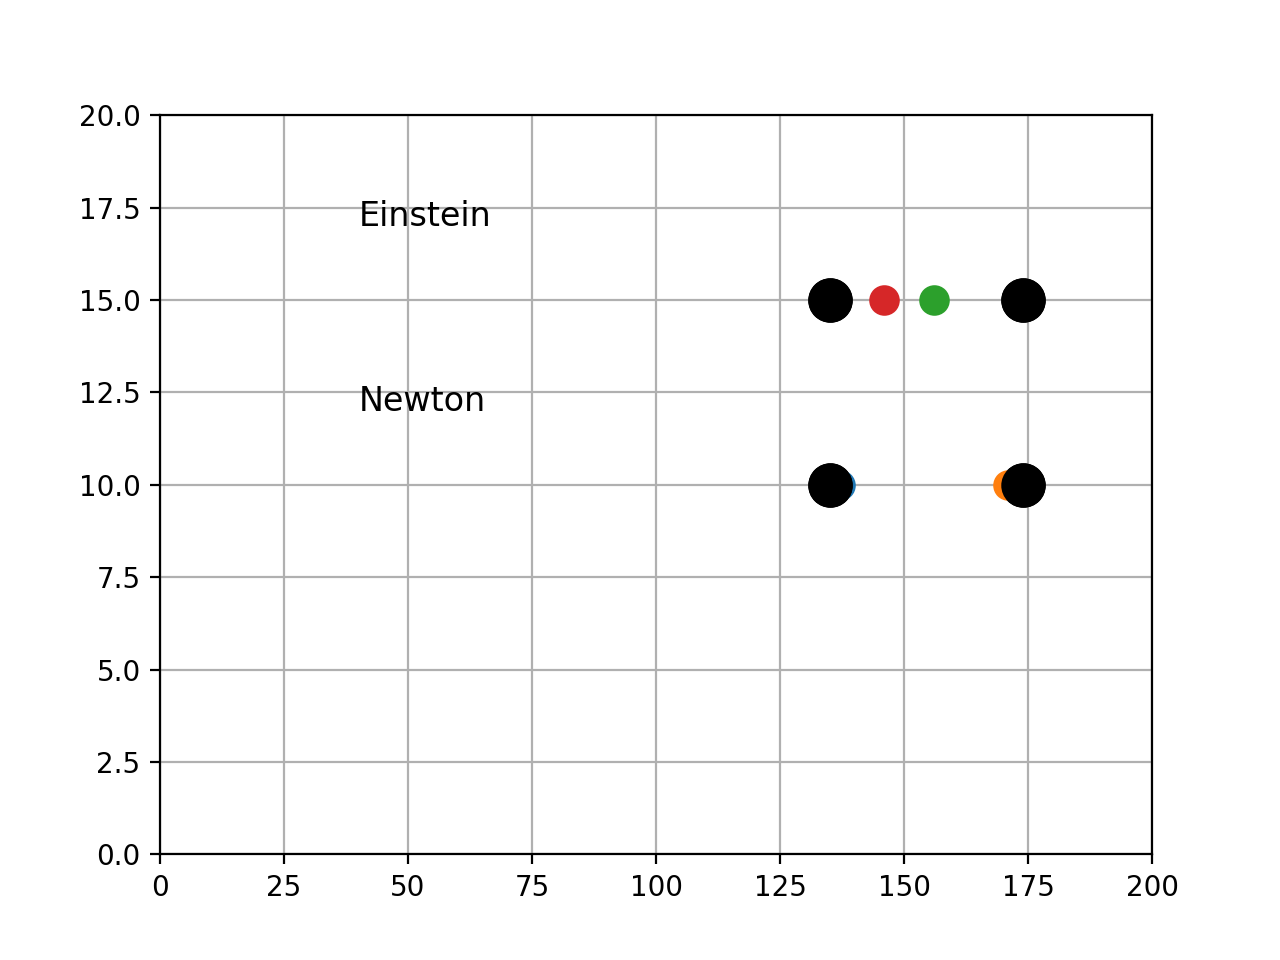

In [13]:
# when we're in pylab mode, the next two imports are not necessary
# we do it here for correctness sake, iow your code will also run without pylab mode

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib.animation as animation

cor = 1.0

# bounds of the room
xlim = (0,200)
ylim = (0,20)

# 1 millisecond delta t
delta_t = 0.001

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)
ax.grid()

# in Python 2.7 we have to derive from object to have new-style classes
# in Python 3 this is still valid, but not necessary, as all classes are new-style
class Ball(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((1.0, 10.0))
        self.limit0f = np.array((40.0, 10.0))
        
        self.limit0V0 = np.array((0.2, 0.0))
        self.limit0Vf = np.array((0.2, 0.0))
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((1.0, 10.0))
        self.limitf = np.array((40.0, 10.0))
        
        self.limitV0 = np.array((0.2, 0.0))
        self.limitVf = np.array((0.2, 0.0))
        
        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0
        
        self.xy += self.v
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        self.line0.set_data(self.limit0)
        self.linef.set_data(self.limitf)


#balls = [Ball((9.0,10.0), (-0.2,0.0)), Ball((9.0,10.0), (0.8,0.0))]

balls = [Ball((20,10.0), (-0.3,0.0)), Ball((20,10.0), (0.7,0.0)), 
          Ball2((20,15.0), (-0.5,0.0)), Ball2((20,15.0), (0.5,0.0))]

for ball in balls:
    ball.update()

def init():
    return []

def animate(t):
    # t is time in seconds
    global xy, v

    for ball in balls:
        ball.update()

    # have to return an iterable
    return [ball.scatter for ball in balls]

# interval in milliseconds
# we're watching in slow motion (delta t is shorter than interval)
ani = animation.FuncAnimation(fig, animate, np.arange(0,100,delta_t), init_func=init, interval=10, blit=True)

plt.text(40, 17, "Einstein", fontsize=12)
plt.text(40, 12, "Newton", fontsize=12)

plt.show()

In [14]:
plt.close()

### Simulation 3 (average speed)

### Moving ball Einstein

In [15]:
class Ball2(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((1.0, 15.0))
        self.limit0f = np.array((40.0, 15.0))
        
        self.limit0V0 = np.array((0.2, 0.0))
        self.limit0Vf = np.array((0.2, 0.0))
        
        self.deltanx = 0
        self.deltapx = 0
        self.displayn, = ax.plot([], [], 'r*', markersize=5)
        self.displayp, = ax.plot([], [], 'g*', markersize=5)
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((1.0, 15.0))
        self.limitf = np.array((40.0, 15.0))
        
        self.limitV0 = np.array((0.2, 0.0))
        self.limitVf = np.array((0.2, 0.0))

        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0])
            self.displayn.set_data([0,0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0])
            self.displayp.set_data([0,0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0

        self.xy += self.v
        
        if self.v[0] < 0:
            self.deltanx += np.abs(self.v[0])
        elif self.v[0] > 0:
            self.deltapx += np.abs(self.v[0])
        
        if self.deltanx >= 6:
            self.displayn.set_data(self.xy)
            self.deltanx = 0
        
        if self.deltapx >= 6:
            self.displayp.set_data(self.xy)
            self.deltapx = 0
        
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        #self.line0.set_data(self.limit0)
        #self.linef.set_data(self.limitf)

In [222]:
plt.close()

### Moving ball Newton

<IPython.core.display.Javascript object>


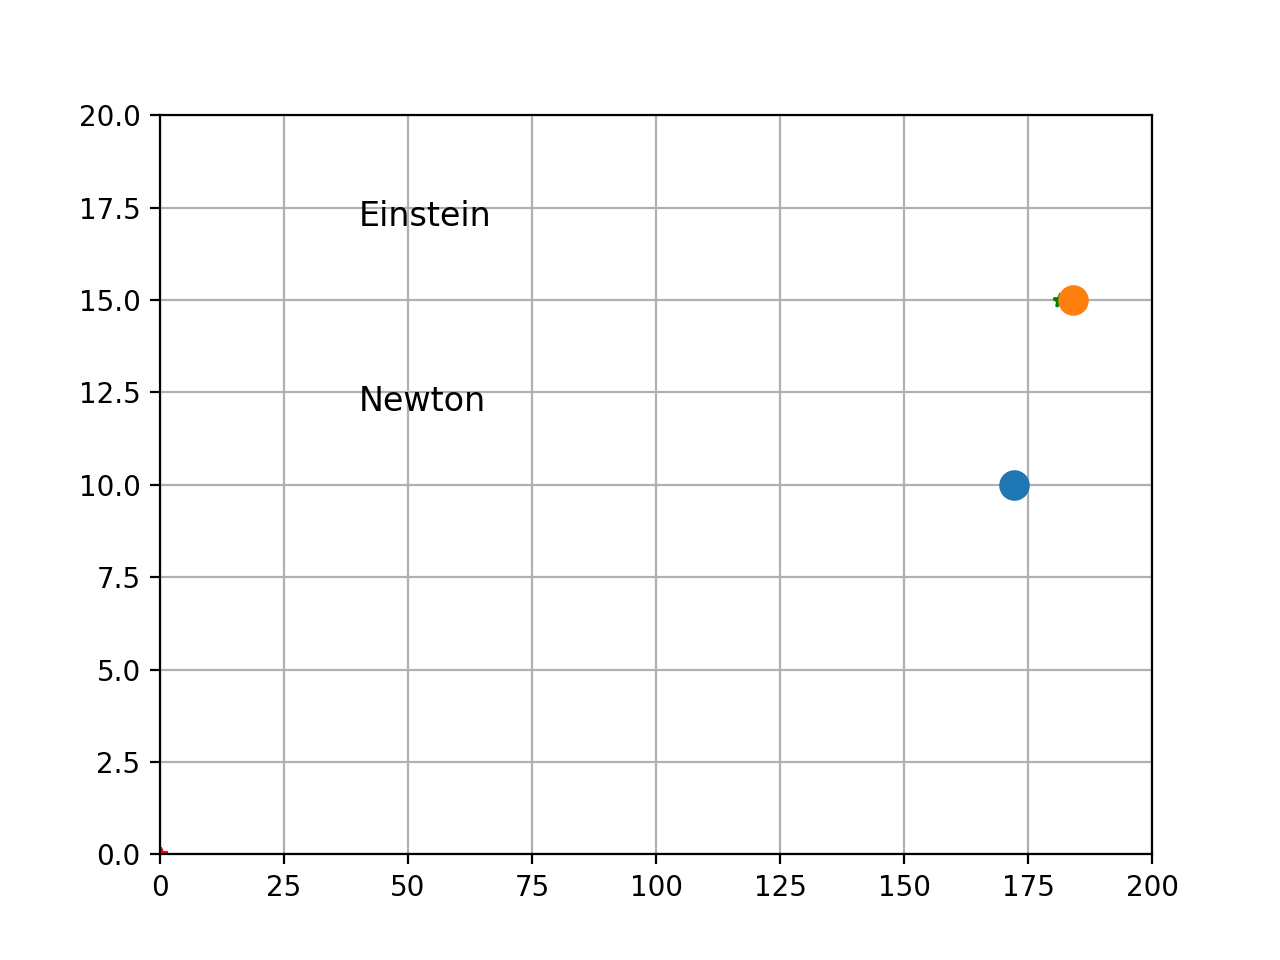

In [16]:
# when we're in pylab mode, the next two imports are not necessary
# we do it here for correctness sake, iow your code will also run without pylab mode

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib.animation as animation

cor = 1.0

# bounds of the room
xlim = (0,200)
ylim = (0,20)

# 1 millisecond delta t
delta_t = 0.001

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)
ax.grid()

# in Python 2.7 we have to derive from object to have new-style classes
# in Python 3 this is still valid, but not necessary, as all classes are new-style
class Ball(object):

    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        self.xy0 = np.array(xy)
        self.v0 = np.array(v)
        
        self.limit00 = np.array((1.0, 10.0))
        self.limit0f = np.array((40.0, 10.0))
        
        self.limit0V0 = np.array((0.2, 0.0))
        self.limit0Vf = np.array((0.2, 0.0))
        
        self.deltanx = 0
        self.deltapx = 0
        self.displayn, = ax.plot([], [], 'r*', markersize=5)
        self.displayp, = ax.plot([], [], 'g*', markersize=5)
        
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.limit0 = np.array((1.0, 10.0))
        self.limitf = np.array((40.0, 10.0))
        
        self.limitV0 = np.array((0.2, 0.0))
        self.limitVf = np.array((0.2, 0.0))
        
        self.scatter, = ax.plot([], [], 'o', markersize=10)
        self.line0, = ax.plot([], [], 'ko', markersize=15)
        self.linef, = ax.plot([], [], 'ko', markersize=15)

    def update(self):
        if self.xy[0] <= self.limit0[0]:
            # hit the left wall, reflect x component
            # v1 = 2u2 - u1
            self.v[0] =  np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])
            self.displayn.set_data([0,0])

        elif self.xy[0] >= self.limitf[0]:
            self.v[0] =  - np.abs(self.v[0]) + 2*np.abs(self.limitV0[0])
            self.displayp.set_data([0,0])
            
        if (self.limit0[0] <= xlim[0]) | (self.limitf[0] >= xlim[1]):
            # Come back to initial conditions
            self.limit0 = self.limit00
            self.limitf = self.limit0f
            self.limitV0 = self.limit0V0
            self.limitVf = self.limit0Vf
            self.xy = self.xy0
            self.v = self.v0
        
        self.xy += self.v
        
        if self.v[0] < 0:
            self.deltanx += np.abs(self.v[0])
        elif self.v[0] > 0:
            self.deltapx += np.abs(self.v[0])
        
        if self.deltanx >= 6:
            self.displayn.set_data(self.xy)
            self.deltanx = 0
        
        if self.deltapx >= 6:
            self.displayp.set_data(self.xy)
            self.deltapx = 0
        
        self.limit0 += self.limitV0
        self.limitf += self.limitVf

        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        self.limit0[0] = np.clip(self.limit0[0], xlim[0], xlim[1])
        self.limit0[1] = np.clip(self.limit0[1], ylim[0], ylim[1])
        
        self.limitf[0] = np.clip(self.limitf[0], xlim[0], xlim[1])
        self.limitf[1] = np.clip(self.limitf[1], ylim[0], ylim[1])

        self.scatter.set_data(self.xy)
        #self.line0.set_data(self.limit0)
        #self.linef.set_data(self.limitf)


#balls = [Ball((9.0,10.0), (-0.2,0.0)), Ball((9.0,10.0), (0.8,0.0))]

# balls = [Ball((15,10.0), (-0.2,0.0)), Ball((15,10.0), (0.8,0.0)), 
#          Ball2((15,15.0), (-0.5,0.0)), Ball2((15,15.0), (0.5,0.0))]

balls = [Ball((20,10.0), (-0.3,0.0)), Ball2((20,15.0), (-0.5,0.0))]

for ball in balls:
    ball.update()

def init():
    return []

def animate(t):
    # t is time in seconds
    global xy, v

    for ball in balls:
        ball.update()

    # have to return an iterable
    return [ball.scatter for ball in balls]

# interval in milliseconds
# we're watching in slow motion (delta t is shorter than interval)
ani = animation.FuncAnimation(fig, animate, np.arange(0,100,delta_t), init_func=init, interval=10, blit=True)

plt.text(40, 17, "Einstein", fontsize=12)
plt.text(40, 12, "Newton", fontsize=12)

plt.show()

In [17]:
plt.close()